Лабораторная работа №1
Завадский Никита

In [249]:
import numpy as np         
import pandas as pd       
from scipy import stats 

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF

plt.style.use('ggplot')    # стиль графиков
# %matplotlib inline

# Хи-квадрат
1. Генерация случайных величин в python

In [250]:
#число степеней свободы 
df1 = 1
df5 = 5
df10 = 10

chi_rv1 = stats.chi2(df1)
chi_rv5 = stats.chi2(df5)
chi_rv10 = stats.chi2(df10)

sample = chi_rv10.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print(sample[:10])

[18.25726558  6.93189029  7.2322952   5.42272996 19.08350183  6.41571012
 17.18271158  2.96214624 15.1387058   5.34214116]


2. плотность и функция распределения

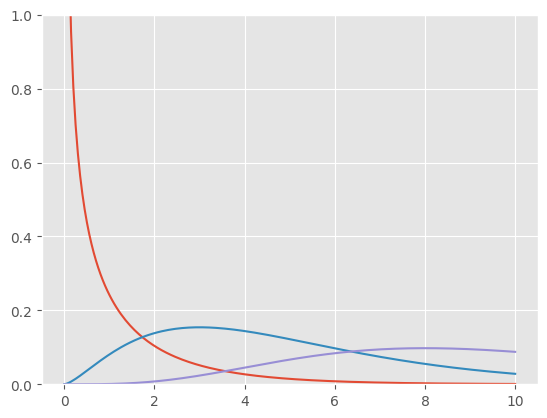

In [251]:
x = np.linspace(0, 10, 200)
pdf1 = chi_rv1.pdf(x)
pdf5 = chi_rv5.pdf(x)
pdf10 = chi_rv10.pdf(x)
plt.ylim(0, 1)
plt.plot(x, pdf1)
plt.plot(x, pdf5)
plt.plot(x, pdf10);

Продолжим с хи-квадрат распределением с 10 степенями свободы 

Теперь узнаем значение функции распределения в точке $5$: $$F(5) = P(X \le 5) = \int_{-\infty}^5 f(x)dx$$

In [252]:
print(chi_rv10.cdf(5))

0.10882198108584877


нарисуем график плотности

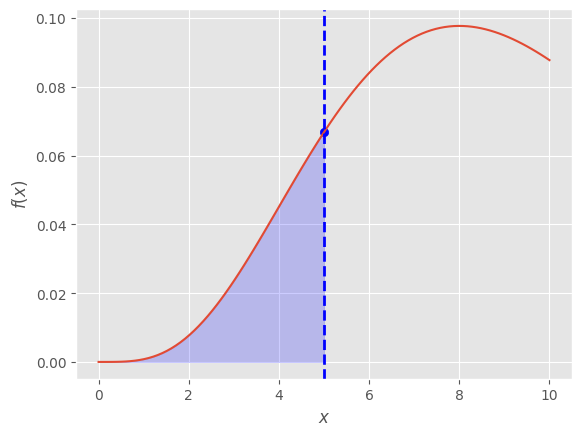

In [253]:
x = np.linspace(0, 10, 100)
pdf = chi_rv10.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(5)
plt.scatter([5], [chi_rv10.pdf(5)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(0, 5, 100)
yq = chi_rv10.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(5, color='blue', linestyle="--", lw=2);

Построим график функции распределения

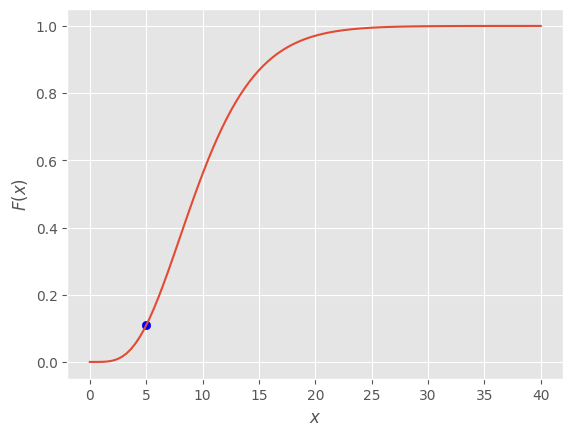

In [254]:
x = np.linspace(0, 40, 100)
cdf = chi_rv10.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(5)
plt.scatter([5], [chi_rv10.cdf(5)], color="blue");

Найдём вероятность попадания в отрезок, например,

$$ P(4 < X < 8) = \int_4^8 f(x) dx = F(8) - F(4)$$

In [255]:
print(chi_rv10.cdf(8)-chi_rv10.cdf(4))

0.31851004747641554


Изобразим вероятность попасть в конкретный отрезок на плотности распределения

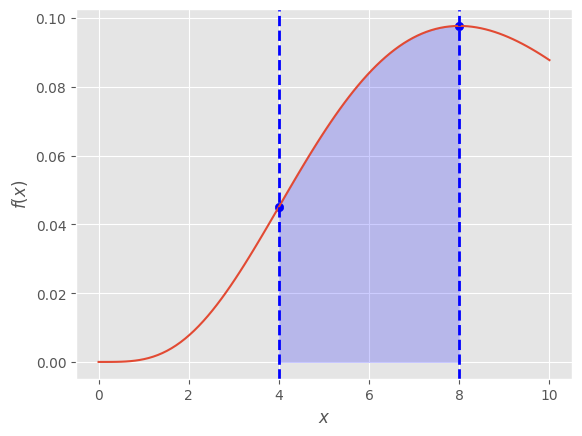

In [256]:
x = np.linspace(0, 10, 100)
pdf = chi_rv10.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([4, 8], [chi_rv10.pdf(4), chi_rv10.pdf(8)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(4, 8)
yq = chi_rv10.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(4, color='blue', linestyle="--", lw=2)
plt.axvline(8, color='blue', linestyle="--", lw=2);

Квантили распределения.

In [257]:
q = np.quantile(sample, 0.1)
print(q)

4.725828530918996


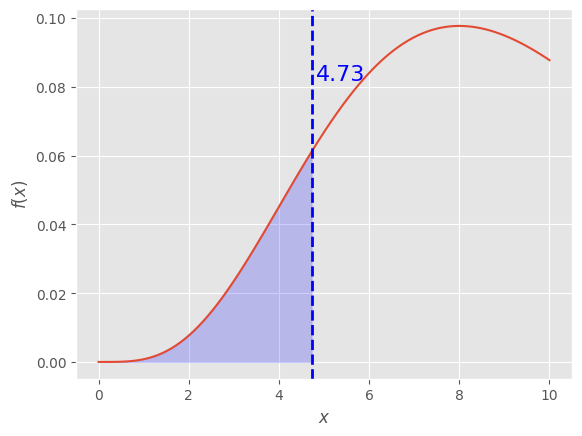

In [258]:
x = np.linspace(0, 10, 100)
pdf = chi_rv10.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(0, q)
yq = chi_rv10.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Сравнение графиков гистограммы и плотности

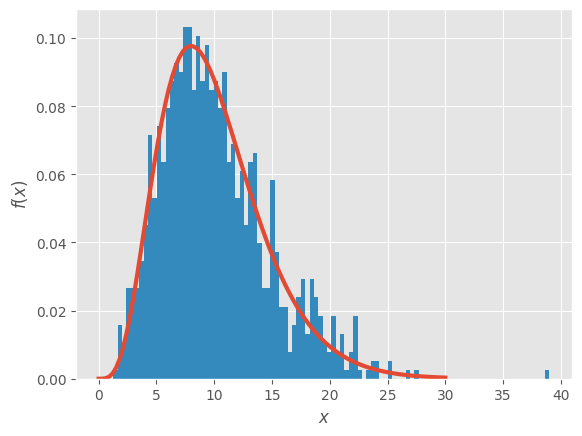

In [259]:
x = np.linspace(0, 30, 100)
pdf = chi_rv10.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=100, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

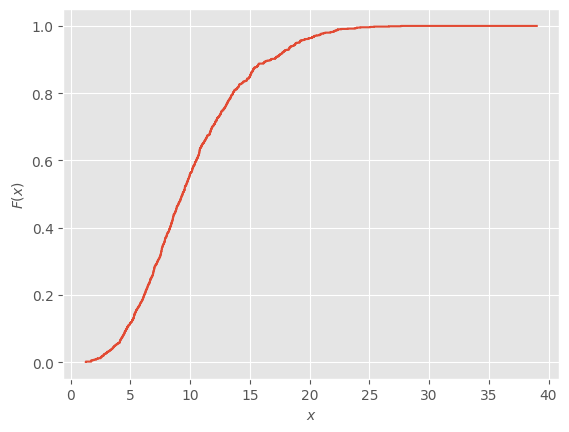

In [260]:
ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=10)
plt.xlabel('$x$', fontsize=10);

Нарисуем её на одной картинке с теоретической:

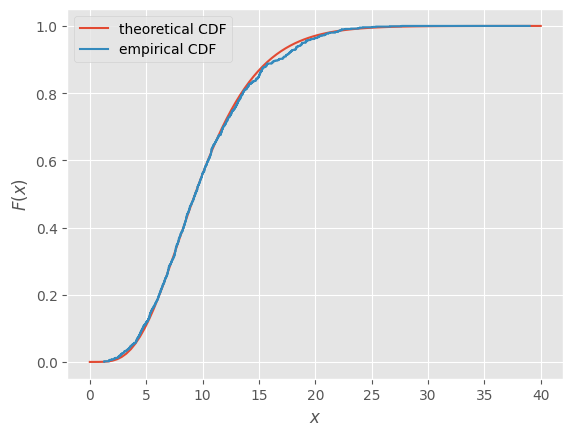

In [261]:
x = np.linspace(0, 40, 100)

# теоретическа cdf 
cdf = chi_rv10.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# Стьюдент
1. Генерация случайных величин в python

In [262]:
#число степеней свободы 
df1 = 1
df5 = 5
df30 = 30

st_rv1 = stats.t(df1)
st_rv5 = stats.t(df5)
st_rv30 = stats.t(df30)

sample = st_rv30.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print(sample[:10])

[ 1.78321191 -0.86121207 -0.61876292 -2.07510673  0.33344101 -0.70123121
 -0.34312042  0.70368013 -0.19645714  1.85476804]


2. плотность и функция распределения

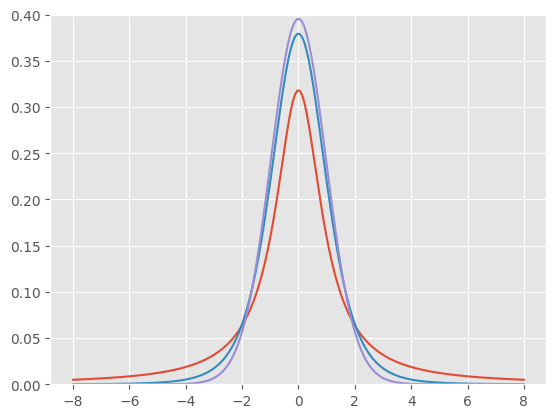

In [263]:
x = np.linspace(-8, 8, 200)
pdf1 = st_rv1.pdf(x)
pdf5 = st_rv5.pdf(x)
pdf30 = st_rv30.pdf(x)
plt.ylim(0, 0.4)
plt.plot(x, pdf1)
plt.plot(x, pdf5)
plt.plot(x, pdf30);

Продолжим с Стьюдента распределением с 30 степенями свободы 

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [264]:
print(st_rv30.cdf(1))

0.8373456922869851


нарисуем график функции

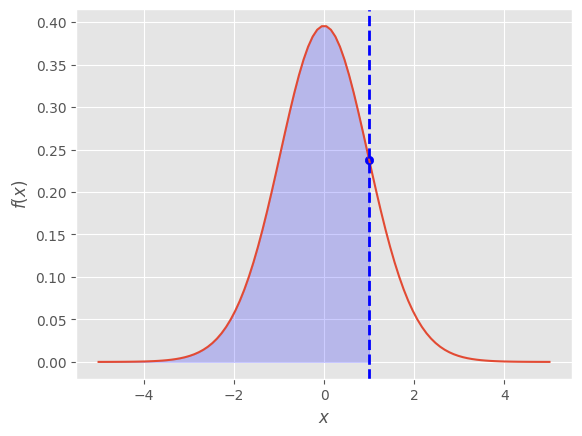

In [265]:
x = np.linspace(-5, 5, 100)
pdf = st_rv30.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(5)
plt.scatter([1], [st_rv30.pdf(1)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-5, 1, 100)
yq = st_rv30.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

Построим график функции распределения

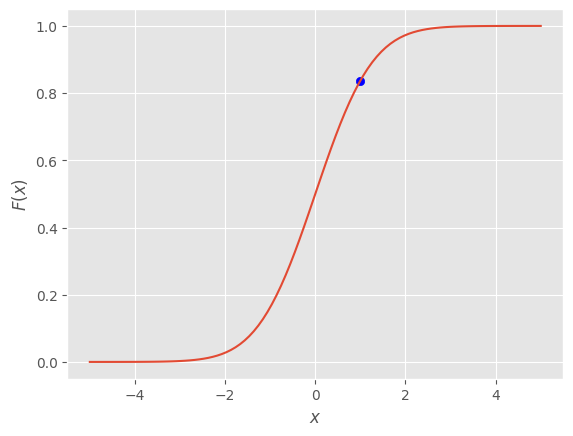

In [266]:
x = np.linspace(-5, 5, 100)
cdf = st_rv30.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [st_rv30.cdf(1)], color="blue");

Найдём вероятность попадания в отрезок, например,

$$ P(-1 < X < 2) = \int_{-1}^2 f(x) dx = F(2) - F(-1)$$

In [267]:
print(st_rv30.cdf(2)-st_rv30.cdf(-1))

0.8100331698054936


Изобразим вероятность попасть в конкретный отрезок на плотности распределения

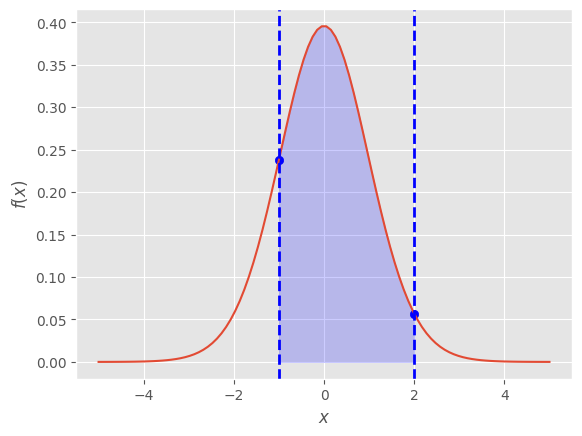

In [268]:
x = np.linspace(-5, 5, 100)
pdf = st_rv30.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([-1, 2], [st_rv30.pdf(-1), st_rv30.pdf(2)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-1, 2)
yq = st_rv30.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(-1, color='blue', linestyle="--", lw=2)
plt.axvline(2, color='blue', linestyle="--", lw=2);

Квантили распределения.

In [269]:
q = np.quantile(sample, 0.1)
print(q)

-1.3089526930313389


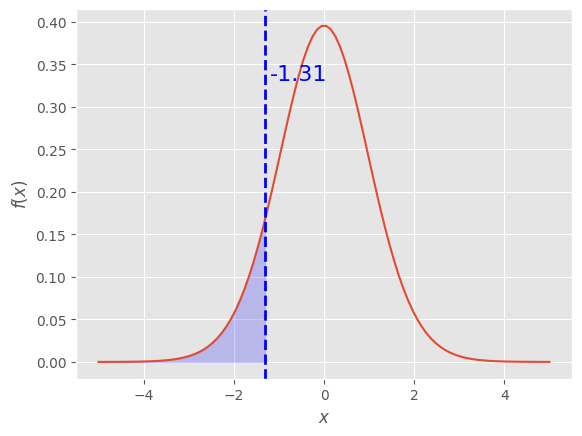

In [270]:
x = np.linspace(-5, 5, 100)
pdf = st_rv30.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-5, q)
yq = st_rv30.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Сравнение графиков гистограммы и плотности

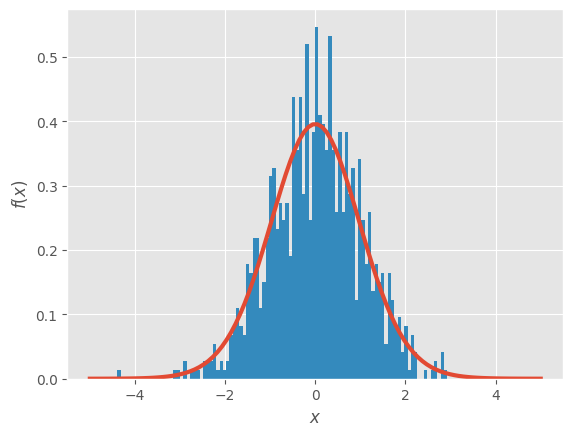

In [271]:
x = np.linspace(-5,5, 100)
pdf = st_rv30.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=100, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

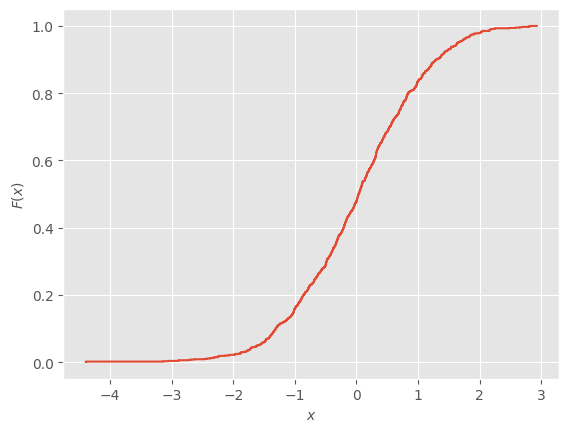

In [272]:
ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=10)
plt.xlabel('$x$', fontsize=10);

Нарисуем её на одной картинке с теоретической:

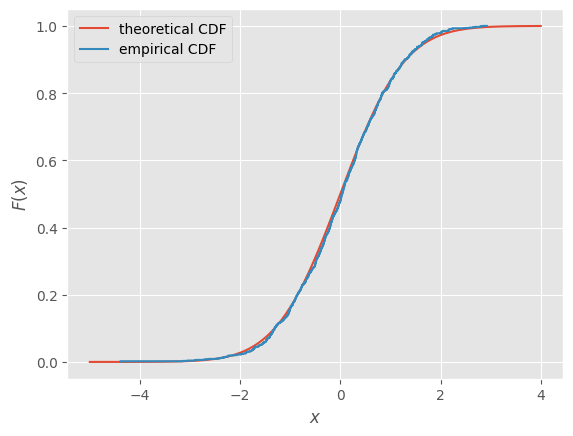

In [273]:
x = np.linspace(-5, 4, 100)

# теоретическа cdf 
cdf = st_rv30.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# Фишер
1. Генерация случайных величин в python

In [274]:
#число степеней свободы 
d1 = 1
d2 = 100

f_rv_1_1 = stats.f(dfn=d1, dfd=d1)
f_rv_1_2 = stats.f(dfn=d1, dfd=d2)
f_rv_2_1 = stats.f(dfn=d2, dfd=d1)
f_rv_2_2 = stats.f(dfn=d2, dfd=d2)

sample = f_rv_2_2.rvs(1000, random_state=1)  # сгенерируем 1000 значений
print(sample[:10])

[1.36362614 1.08366758 1.41608731 1.66224894 1.37298395 1.10811094
 0.72718797 1.25082058 0.89352465 1.02354021]


2. плотность и функция распределения

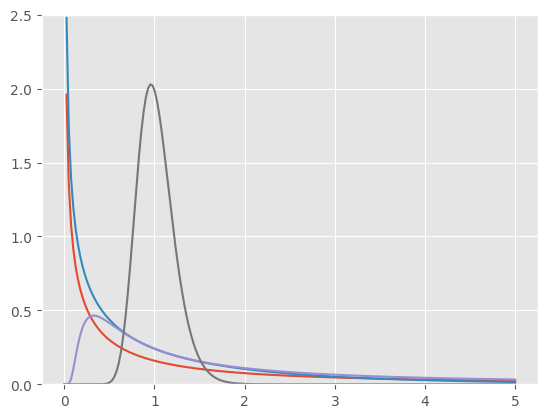

In [275]:
x = np.linspace(0, 5, 200)
pdf11 = f_rv_1_1.pdf(x)
pdf12 = f_rv_1_2.pdf(x)
pdf21 = f_rv_2_1.pdf(x)
pdf22 = f_rv_2_2.pdf(x)
plt.ylim(0, 2.5)
plt.plot(x, pdf11)
plt.plot(x, pdf12)
plt.plot(x, pdf21)
plt.plot(x, pdf22);

Продолжим с распределением Фишера с степенями свободы (100, 100) 

Теперь узнаем значение функции распределения в точке $1$: $$F(1) = P(X \le 1) = \int_{-\infty}^1 f(x)dx$$

In [276]:
print(f_rv_2_2.cdf(1))

0.4999999999999823


нарисуем график функции

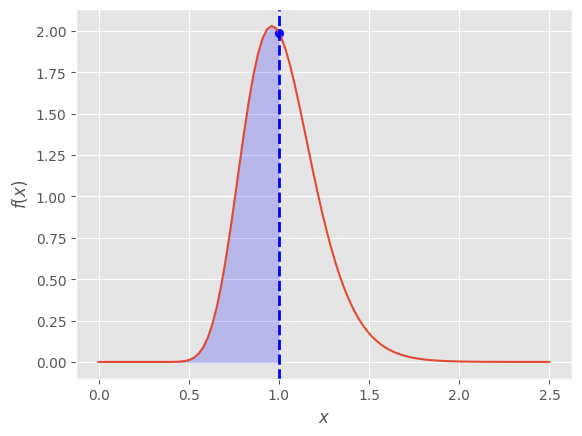

In [277]:
x = np.linspace(0, 2.5, 100)
pdf = f_rv_2_2.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(5)
plt.scatter([1], [f_rv_2_2.pdf(1)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(0, 1, 100)
yq = f_rv_2_2.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2);

Построим график функции распределения

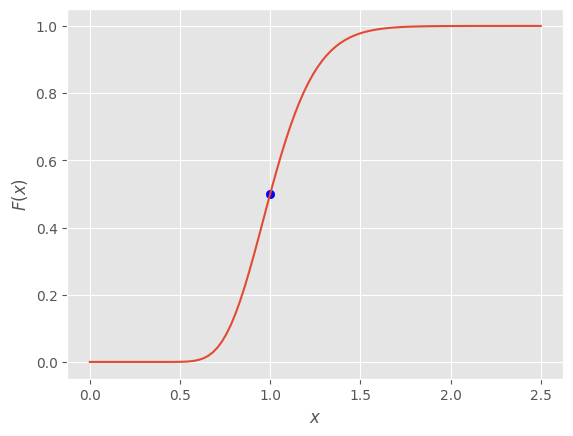

In [278]:
x = np.linspace(0, 2.5, 100)
cdf = f_rv_2_2.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([1], [f_rv_2_2.cdf(1)], color="blue");

Найдём вероятность попадания в отрезок, например,

$$ P(0.75 < X < 1.25) = \int_{0.75}^{1.25} f(x) dx = F(1.25) - F(0.75)$$

In [279]:
print(f_rv_2_2.cdf(1.25)-f_rv_2_2.cdf(0.75))

0.7908643633618021


Изобразим вероятность попасть в конкретный отрезок на плотности распределения

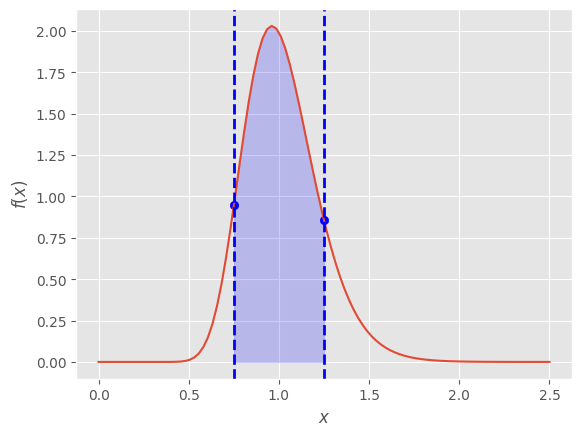

In [280]:
x = np.linspace(0, 2.5, 100)
pdf = f_rv_2_2.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([0.75, 1.25], [f_rv_2_2.pdf(0.75), f_rv_2_2.pdf(1.25)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(0.75, 1.25)
yq = f_rv_2_2.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(0.75, color='blue', linestyle="--", lw=2)
plt.axvline(1.25, color='blue', linestyle="--", lw=2);

Квантили распределения.

In [281]:
q = np.quantile(sample, 0.1)
print(q)

0.7633733729053171


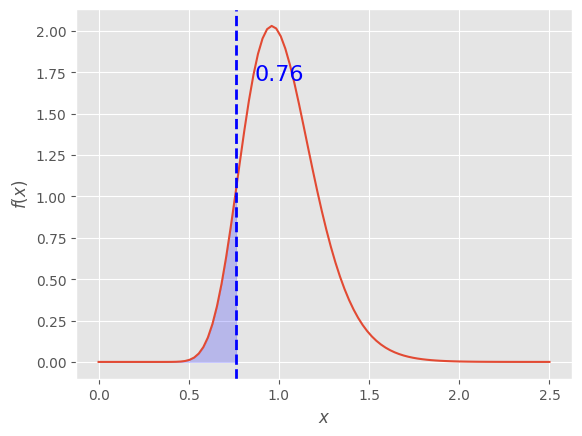

In [282]:
x = np.linspace(0, 2.5, 100)
pdf = f_rv_2_2.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(0, q)
yq = f_rv_2_2.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Сравнение графиков гистограммы и плотности

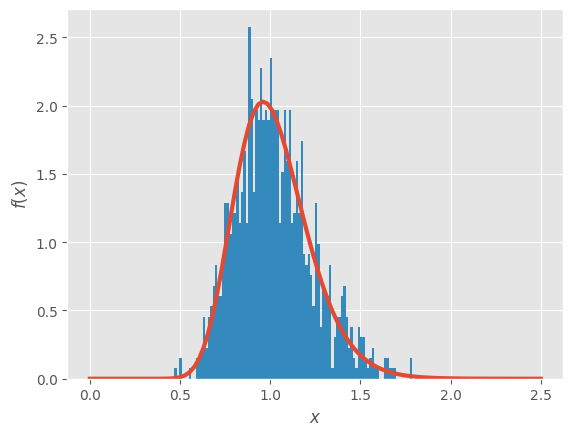

In [283]:
x = np.linspace(0,2.5, 100)
pdf = f_rv_2_2.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=100, density=True);

plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

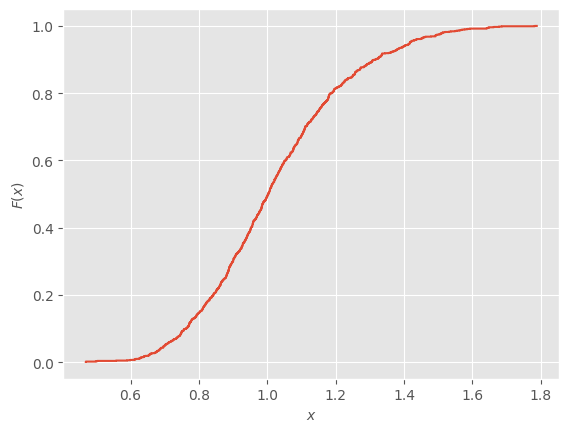

In [284]:
ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.ylabel('$F(x)$', fontsize=10)
plt.xlabel('$x$', fontsize=10);

Нарисуем её на одной картинке с теоретической:

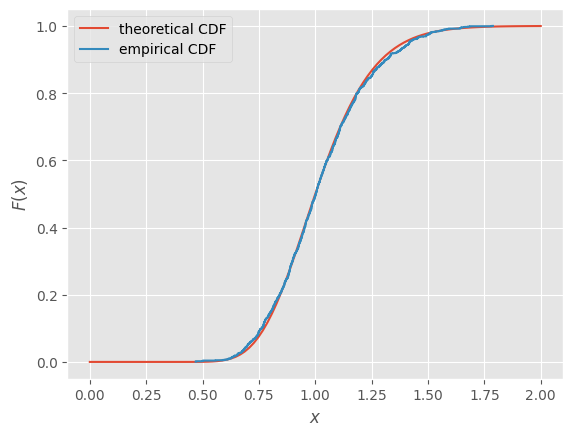

In [285]:
x = np.linspace(0, 2, 100)

# теоретическа cdf 
cdf = f_rv_2_2.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

# Коши
1. Генерация случайных величин в python

In [298]:
x0 = 0
g0 = 0.5
g1 = 1
g2 = 2

c_rv0 = stats.cauchy(x0, g0)
c_rv1 = stats.cauchy(x0, g1)
c_rv2 = stats.cauchy(x0, g2)

sample = c_rv1.rvs(1000, random_state=2)  # сгенерируем 1000 значений
print(sample[:10])

[ -0.20383252 -12.25036027   0.15729767  -0.206034    -0.25552507
  -0.58997947  -1.33494142   0.39328105  -0.72820138  -0.89949083]


2. плотность и функция распределения

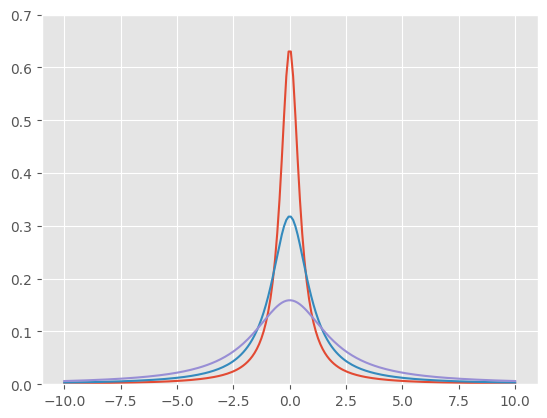

In [287]:
x = np.linspace(-10, 10, 200)
pdf0 = c_rv0.pdf(x)
pdf1 = c_rv1.pdf(x)
pdf2 = c_rv2.pdf(x)
plt.ylim(0, 0.7)
plt.plot(x, pdf0)
plt.plot(x, pdf1)
plt.plot(x, pdf2);

Продолжим с распределением Коши со смещением x = 0 и масштабом 1 

Теперь узнаем значение функции распределения в точке $0.5$: $$F(0.5) = P(X \le 0.5) = \int_{-\infty}^{0.5} f(x)dx$$

In [288]:
print(c_rv1.cdf(0.5))

0.6475836176504333


нарисуем график функции

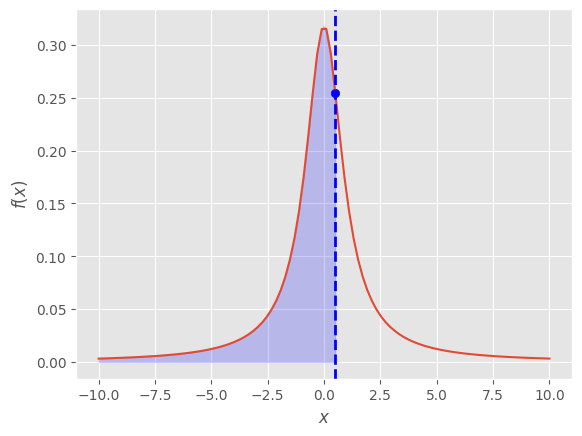

In [289]:
x = np.linspace(-10, 10, 100)
pdf = c_rv1.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# На ней же нарисуем f(5)
plt.scatter([0.5], [c_rv1.pdf(0.5)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(-10,0.5, 100)
yq = c_rv1.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(0.5, color='blue', linestyle="--", lw=2);

Построим график функции распределения

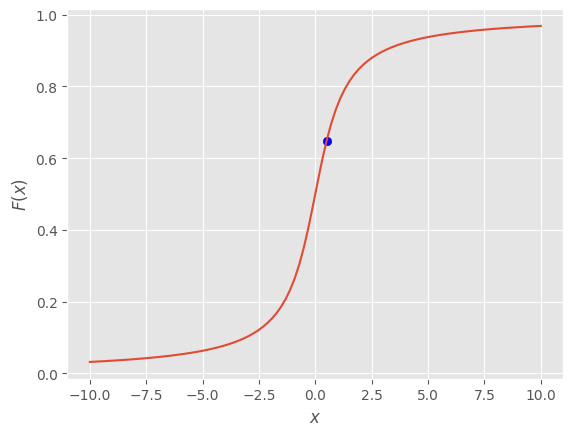

In [290]:
x = np.linspace(-10, 10, 100)
cdf = c_rv1.cdf(x)

plt.plot(x, cdf)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# На ней же нарисуем F(1)
plt.scatter([0.5], [c_rv1.cdf(0.5)], color="blue");

Найдём вероятность попадания в отрезок, например,

$$ P(1 < X < 5) = \int_{1}^{5} f(x) dx = F(5) - F(1)$$

In [291]:
print(c_rv1.cdf(5)-c_rv1.cdf(1))

0.18716704181099897


Изобразим вероятность попасть в конкретный отрезок на плотности распределения

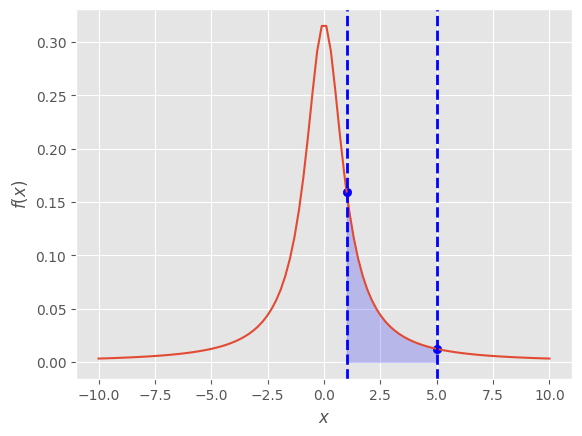

In [292]:
x = np.linspace(-10, 10, 100)
pdf = c_rv1.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

plt.scatter([1, 5], [c_rv1.pdf(1), c_rv1.pdf(5)], color="blue");

# на ту же картинку добавили новую часть, штриховку
xq = np.linspace(1, 5)
yq = c_rv1.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(1, color='blue', linestyle="--", lw=2)
plt.axvline(5, color='blue', linestyle="--", lw=2);

Квантили распределения.

In [293]:
q = np.quantile(sample, 0.1)
print(q)

-2.8406864964934497


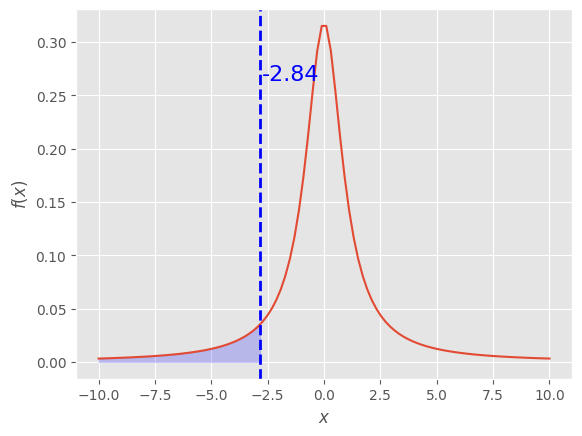

In [294]:
x = np.linspace(-10, 10, 100)
pdf = c_rv1.pdf(x)

plt.plot(x, pdf)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

xq = np.linspace(-10, q)
yq = c_rv1.pdf(xq)
plt.fill_between(xq, 0, yq, color='blue', alpha=0.2)

plt.axvline(q, color='blue', linestyle="--", lw=2)

y_max = plt.ylim()[1]
plt.text(q + 0.1, 0.8*y_max, round(q,2), color='blue', fontsize=16);

Сравнение графиков гистограммы и плотности

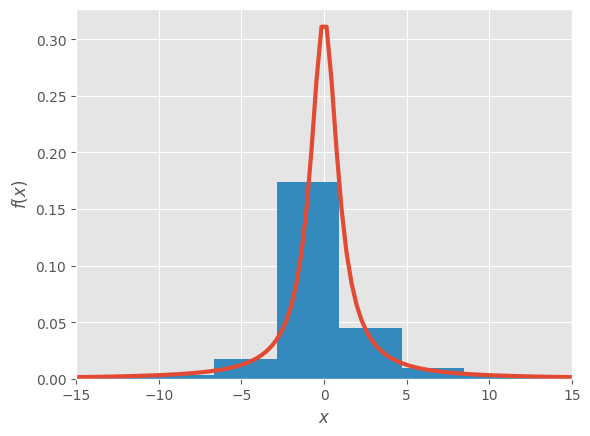

In [299]:
x = np.linspace(-15, 15, 100)
pdf = c_rv1.pdf(x)

# плотность 
plt.plot(x, pdf, lw=3)

# гистограмма, параметр density отнормировал её. 
plt.hist(sample, bins=100, density=True);

plt.xlim(-15,15)
plt.ylabel('$f(x)$')
plt.xlabel('$x$');

Построим по выборке эмпирическую функцию распределения. 

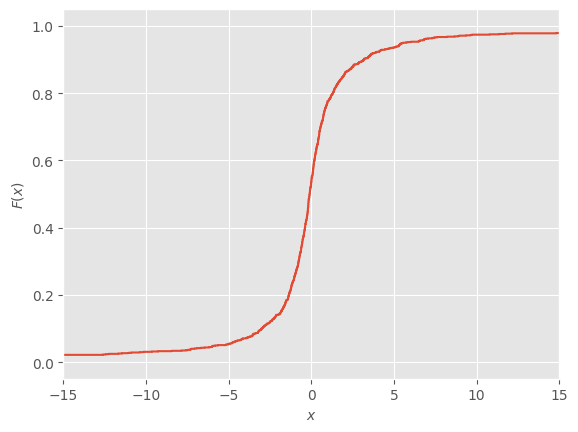

In [305]:
ecdf = ECDF(sample)   # строим эмпирическую функцию по выборке

plt.step(ecdf.x, ecdf.y)
plt.xlim(-15, 15)
plt.ylabel('$F(x)$', fontsize=10)
plt.xlabel('$x$', fontsize=10);

Нарисуем её на одной картинке с теоретической:

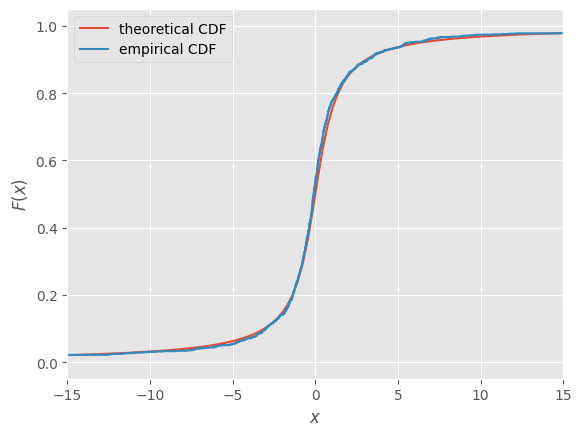

In [304]:
x = np.linspace(-15, 15, 100)

# теоретическа cdf 
cdf = c_rv1.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# эмпирическая сdf
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='empirical CDF')

plt.xlim(-15, 15)
plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');